# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [72]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

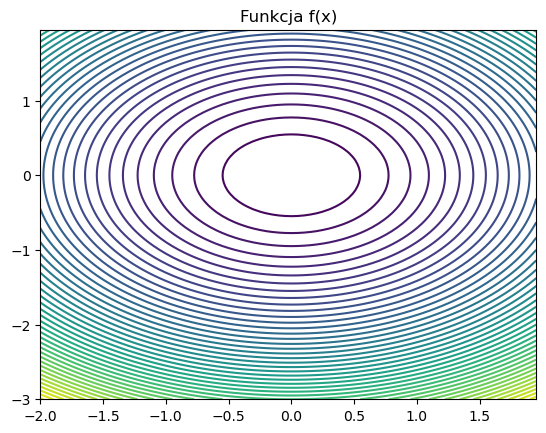

In [73]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.title("Funkcja f(x)")
plt.contour(X, Y, Z, 50)

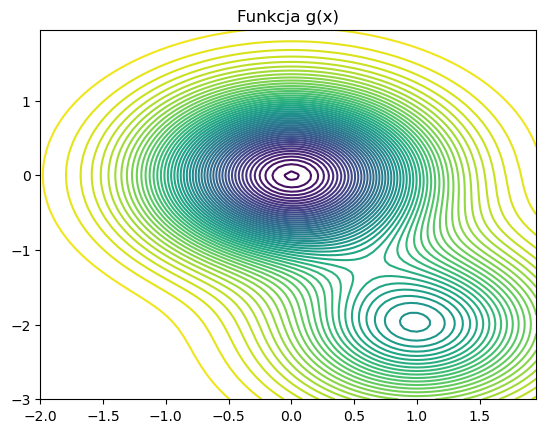

In [74]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("Funkcja g(x)")
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [75]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha: float = 0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10, color="red")

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        dx1, dx2 = self.calculate_func_grad(x1, x2)
        return x1 - self.alpha * dx1, x2 - self.alpha * dx2

    def minimize(self,
                 x1_init: float,
                 x2_init: float,
                 steps: int = 100,
                 verbose: bool = False,
                 plot: bool = False) -> tuple[tuple[float, float], float]:
        start_time = time.process_time()
        
        x1, x2 = x1_init, x2_init
        self.trace = np.zeros((steps + 1, 2))
        self.trace[0] = x1, x2
        
        for i in range(steps):
            x1, x2 = self.gradient_descent_step(x1, x2)
            self.trace[i + 1] = [x1, x2]
            
            if verbose:
                print(f"Step: {i + 1}; \tx1 = {x1}; \tx2 = {x2}; \tf(x) = {self.calculate_func_value(x1, x2)}")
        
        if verbose:
            print(f"Time: {time.process_time() - start_time}")
        
        if plot:
            self.plot_func()
        
        return (x1, x2), self.calculate_func_value(x1, x2)
        

# Rozwiązanie

## Funkcja 1
Wartość funkcji 1 oraz wartość jej gradientu:

\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

Definicja powyższych wzorów jako funkcje Python:

In [76]:
def f(x1, x2) -> float:
    return x1**2 + x2**2


def grad_f(x1, x2) -> Tuple[float, float]:
    return 2 * x1, 2 * x2

Przeprowadzono eksperyment dla funkcji 1 z różnymi wartościami parametru alpha oraz dla różnych skoków jednostkowych.

### Eksperyment 1
Wykonano go dla punktu początkowego (-2.0, -2.0) oraz  `alpha` = 100:

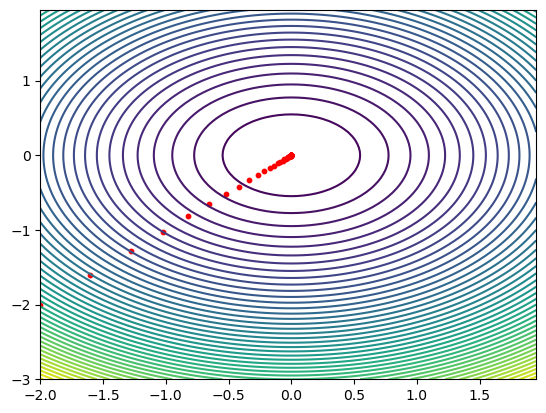

In [77]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.1)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(-2.0, -2.0, 100, verbose=False, plot=True)

In [78]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (-4.0740719526689754e-10, -4.0740719526689754e-10); 	Value at found minimum: f(x1, x2) = 3.3196124551047996e-19; 	Error: 3.3196124551047996e-19


Jak widać algorytm zaczął szybko zbiegać do minimum funkcji. Na początku skoki wykonywane przez program są duże, co wynika z gradientu funkcji o charakterze kwadratowym. Im bliżej rozwiązania, tym algorytm zbiega wolniej. W ciągu 100 iteracji napisana metoda `minimalize` była w stanie wypracować rozwiązanie z bardzo małym błędem rzędu 3e-19.

### Eksperyment 2
Tym razem punkt początkowy także wynosił (-2.0, -2.0), ale parametr alpha zmniejszono do 10:

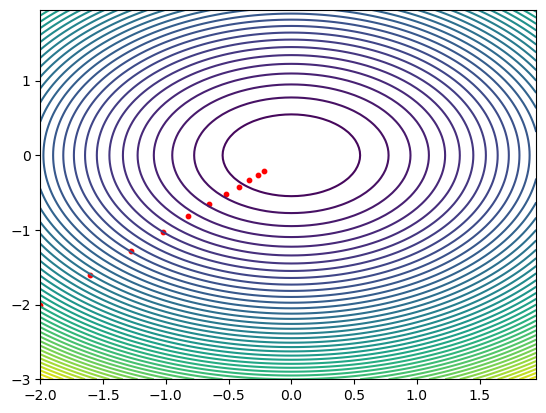

In [79]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.1)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(-2.0, -2.0, 10, verbose=False, plot=True)

In [80]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (-0.21474836480000006, -0.21474836480000006); 	Value at found minimum: f(x1, x2) = 0.09223372036854781; 	Error: 0.09223372036854781


Tym razem liczba iteracji okazała się zbyt mała - wynik nie zdołał zbiec do rozwiązania w punkcie (0, 0). Jednak wartość błędu wartości f(x1, x2) w otrzymanym punkcie nie jest bardzo wielka i wynosi 0.09. Zapewne zwiększenie iteracji o 10 przyniosłoby bardzo dobre wyniki przy nakładzie obliczeń sporo mniejszym niż w eksperymencie 1. 

### Eksperyment 3
W nim bez zmiany ilości iteracji zmieniono punkt startowy algorytmu na (0.1, -1.0):

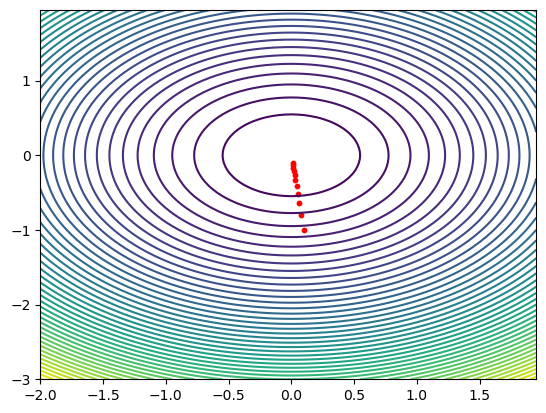

In [81]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.1)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(0.1, -1.0, 10, verbose=False, plot=True)

In [82]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (0.010737418240000003, -0.10737418240000003); 	Value at found minimum: f(x1, x2) = 0.011644507196529161; 	Error: 0.011644507196529161


Tym razem także liczba iteracji okazała się zbyt mała, jednak błąd jest już około 8 razy mniejszy. Wynika z tego, że szybkość zbiegania algorytmu do rozwiązania mocno zależy od wybranego punktu początkwoego.

### Eksperyment 4
W tym eksperymencie wrócono do punktu początkowego (-2.0, -2.0), ale tym razem zwiększono parametr `alpha` do 0.6

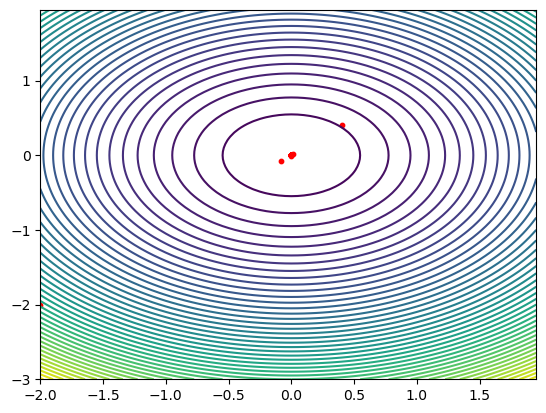

In [83]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.6)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(-2.0, -2.0, 100, verbose=False, plot=True)

In [84]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (-2.5353012004564048e-70, -2.5353012004564048e-70); 	Value at found minimum: f(x1, x2) = 1.2855504354071374e-139; 	Error: 1.2855504354071374e-139


Wynik tego eksperymentu jest imponujący, gdyż błąd jest rzędu 1e-139, czyli mniej niż eps w typie podwójnej precyzji. Jednak widać już problem pojawiający się przy zbyt dużym `alpha`, czyli wpadanie algorytmu w oscylacje, tym razem jeszcze gasnące i zbiegające do bardzo dokładnego rozwiązania. Wartość współczynnika, przy którym algorytm działa jeszcze poprawnie zależy od badanej funkcji. W tym przypadku funkcja ma tylko jedno ekstremum oraz w miarę równomierny rozkład gradientu, dlatego algorytm jest dla niej mało podatny na zły dobór współczynnika `alpha`.

### Eksperyment 5
Tym razem jeszcze bardziej zwiększono `alpha` do 0.99:

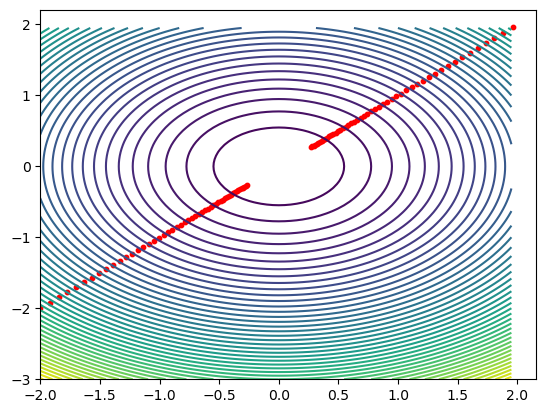

In [85]:
simple_gradient_descent_f = SimpleGradientDescent(f, grad_f, 0.99)
f_minimum, f_minimum_value = simple_gradient_descent_f.minimize(-2.0, -2.0, 100, verbose=False, plot=True)

In [86]:
print(f"Real minimum at: (0, 0); \tf(0, 0) = {f(0.0, 0.0)}; \tFound minimum: {f_minimum}; \tValue at found minimum: f(x1, x2) = {f_minimum_value}; \tError: {abs(f_minimum_value - f(0.0, 0.0))}")

Real minimum at: (0, 0); 	f(0, 0) = 0.0; 	Found minimum: (-0.26523911178950577, -0.26523911178950577); 	Value at found minimum: f(x1, x2) = 0.14070357284577187; 	Error: 0.14070357284577187


Tym razem niestety algorytm zaczął się rozbiegać, nie osiągając rozwiązania.

## Funkcja 2

Wartość funkcji 1 oraz wartość jej gradientu:

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

Definicja powyższych wzorów jako funkcje Python:

In [87]:
def g(x1, x2) -> float:
    return 1.5 - np.exp(-x1**(2) - x2**(2)) - 0.5 * np.exp(-(x1 - 1)**(2) - (x2 + 2)**(2))


def grad_g(x1, x2) -> Tuple[float, float]:
    return (2 * x1 * np.exp(-x1**2 - x2**2) + (x1 - 1) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2),
            2 * x2 * np.exp(-x1**2 - x2**2) + (x2 + 2) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2))

Tym razem funkcja posiada dwa ekstrema - jedno lokalne i jedno globalne, a więc zostaną pokazane potencjalne problemy związane z tym algorytmem.

### Eksperyment 1
Badanie funckji 2 rozpoczęto od ustawienia `alpha` na 0.1 oraz wybrania punktu początkowego (-1.0, -2.0) i liczby iteracji 100:


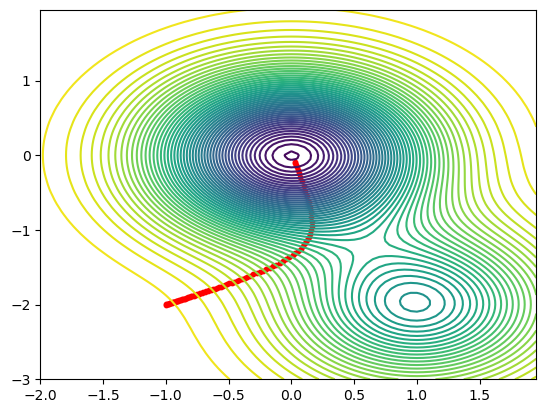

In [88]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 0.1)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(-1.0, -2.0, 100, verbose=False, plot=True)

In [89]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (0.025132689816554737, -0.08988292057553107); 	Value at found minimum: g(x1, x2) = 0.5036413828678885; 	Error: 0.0070103563674312475


Jak widać, w przypadku tej funkcji algorytm wolniej zbiega do rozwiązania. Po 100 iteracjach osiągnął minimum globalne z dokładnością jedynie do 0.007.

### Eksperyment 2
Tym razem obrano punkt początkowy (-1.5, -2.0):

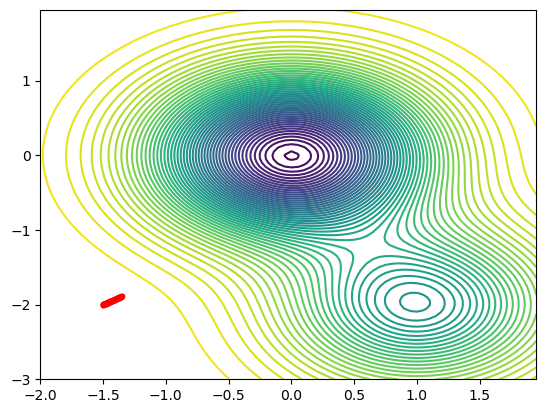

In [90]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 0.1)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(-1.5, -2.0, 100, verbose=False, plot=True)

In [91]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (-1.3518953210532267, -1.8887188919785234); 	Value at found minimum: g(x1, x2) = 1.493504408131042; 	Error: 0.9968733816305848


Bardzo ciekawe jest jak zmiana jednej współrzędnej punktu początkowego spowolniła zbieganie algorytmu do rozwiązania. W ciągu 100 iteracji algorytm bardzo nieznacznie przesunął swój punkt pracy. Wynika to z charakteru badanej funkcji. Widać, że w miejscu, gdzie umieszczono punkt początkowy, gradient funkcji jest prawie zerowy, co wynika z tego, że w tym obszarze wartość funkcji prawie się nie zmienia, co widać na braku warstwic w tym obszarze wykresu.

### Eksperyment 3
Zwiększono parametr `alpha` do 0.5, zostawiając pozostałe parametry bez zmian:

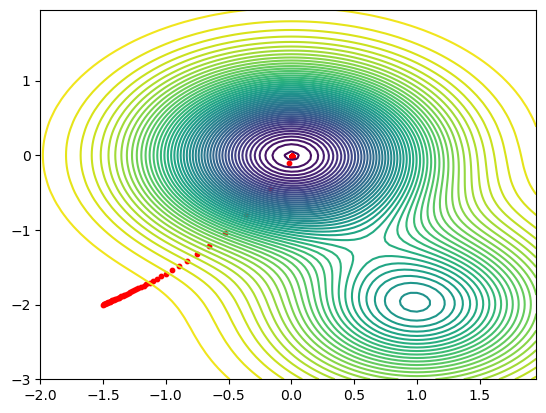

In [92]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 0.5)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(-1.5, -2.0, 100, verbose=False, plot=True)

In [93]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (0.0034760137633066722, -0.0069520275266133445); 	Value at found minimum: g(x1, x2) = 0.4965724836763416; 	Error: 5.8542824115659364e-05


Przy takiej wartość współczynnika `alpha` algorytm nie miał już problemu ze zbieganiem do rozwiązania i osiągnął przyzwoitą wartość błędu na poziomie prawie 6e-5. Dodatkowo widać, że algorytm zbiega szybciej niż w eksperymencie pierwszym, gdyż krzywa zakreślona przez czerwone punkty jest bardziej prosta niż w tamtym przypadku. Warto zwrócić też uwagę na rozmieszczenie punktów oraz to, jak niewiele ich jest w miejscu, gdzie gradient funkcji jest duży.

### Eksperyment 4
Tym razem jeszcze bardziej zwiększono parametr `alpha` do 1.1:

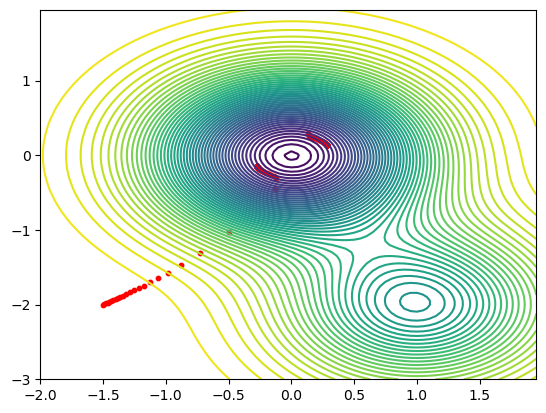

In [94]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 1.1)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(-1.5, -2.0, 100, verbose=False, plot=True)

In [95]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (-0.27711788840537066, -0.1483678592374666); 	Value at found minimum: g(x1, x2) = 0.5909086409707708; 	Error: 0.09427761447031352


W tym przypadku wartość tego współczynnika jest za duża, przez co algorytm zaczął omijać obszar blisko rozwiązania.

### Eksperyment 5
Na koniec wybrano punkt startowy w obszarze atrakcji ekstremum lokalnego (0.25, -1.418), a także przywrócono parametr `alpha` na 0.1:

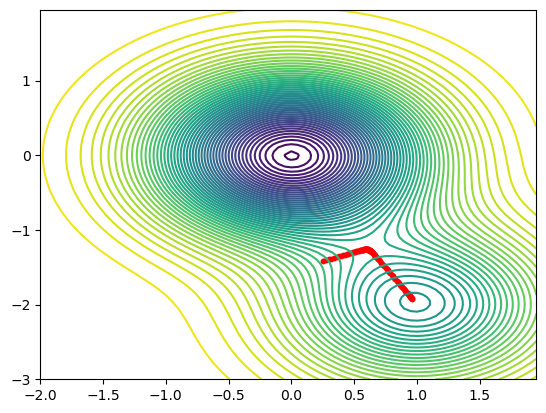

In [96]:
simple_gradient_descent_g = SimpleGradientDescent(g, grad_g, 0.1)
g_minimum, g_minimum_value = simple_gradient_descent_g.minimize(0.25, -1.418, 100, verbose=False, plot=True)

In [97]:
print(f"Real minimum at: (0, 0); \tg(0, 0) = {g(0.0, 0.0)}; \tFound minimum: {g_minimum}; \tValue at found minimum: g(x1, x2) = {g_minimum_value}; \tError: {abs(g_minimum_value - g(0.0, 0.0))}")

Real minimum at: (0, 0); 	g(0, 0) = 0.49663102650045726; 	Found minimum: (0.9591777963595587, -1.9185125351588326); 	Value at found minimum: g(x1, x2) = 0.9940914496945172; 	Error: 0.49746042319406


Tak dobrano tutaj punkt początkowy, aby pokazać, jak trajektoria algorytmu biegnie między dwoma obszarami atrakcji ekstremów, a następnie gwałtownie zaczyna zbiegać do minimum lokalnego. W tym przypadku jej punkty są rozłożone bardzo gęsto, dlatego też algorytm nie zdążył otrzymać dokładnego wyniku, przez co błąd wynosi aż około 0.5. Pokazuje to cechę algorytmu najszybszego spadku gradientu, czyli to, że nie zawsze wynajduje on ekstrema globalne.

## Podsumowanie
Działanie algorytmu najszybszego spadku zależy mocno od badanej funkcji, wybranych parametrów algorytmu oraz punktu początkowego. W przypadku prostych funkcji o jednym ekstremum działa on dobrze i jest mało podatny na zły dobór parametrów. Jednak gdy funkcja ma wiele ekstremów, pojawia się problem z tym, że algorytm może nie wskazać optymalnego globalnie rozwiązania. Dlatego ważny jest umiejętny dobór parametrów oraz punktów początkowych, co jednak może być trudne, gdy funkcja ma wiele wymiarów i niemożliwe jest wyobrażenie przestrzenne rozważanej funkcji.